In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [21]:
# Load the dataset
file_path = 'Copy of glass.csv'
data = pd.read_csv(file_path)

In [22]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values before imputation:\n", missing_values)

Missing values before imputation:
 RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64


In [23]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [24]:
# Ensure 'Type' is categorical and encoded correctly
data_imputed['Type'] = data_imputed['Type'].astype('category').cat.codes

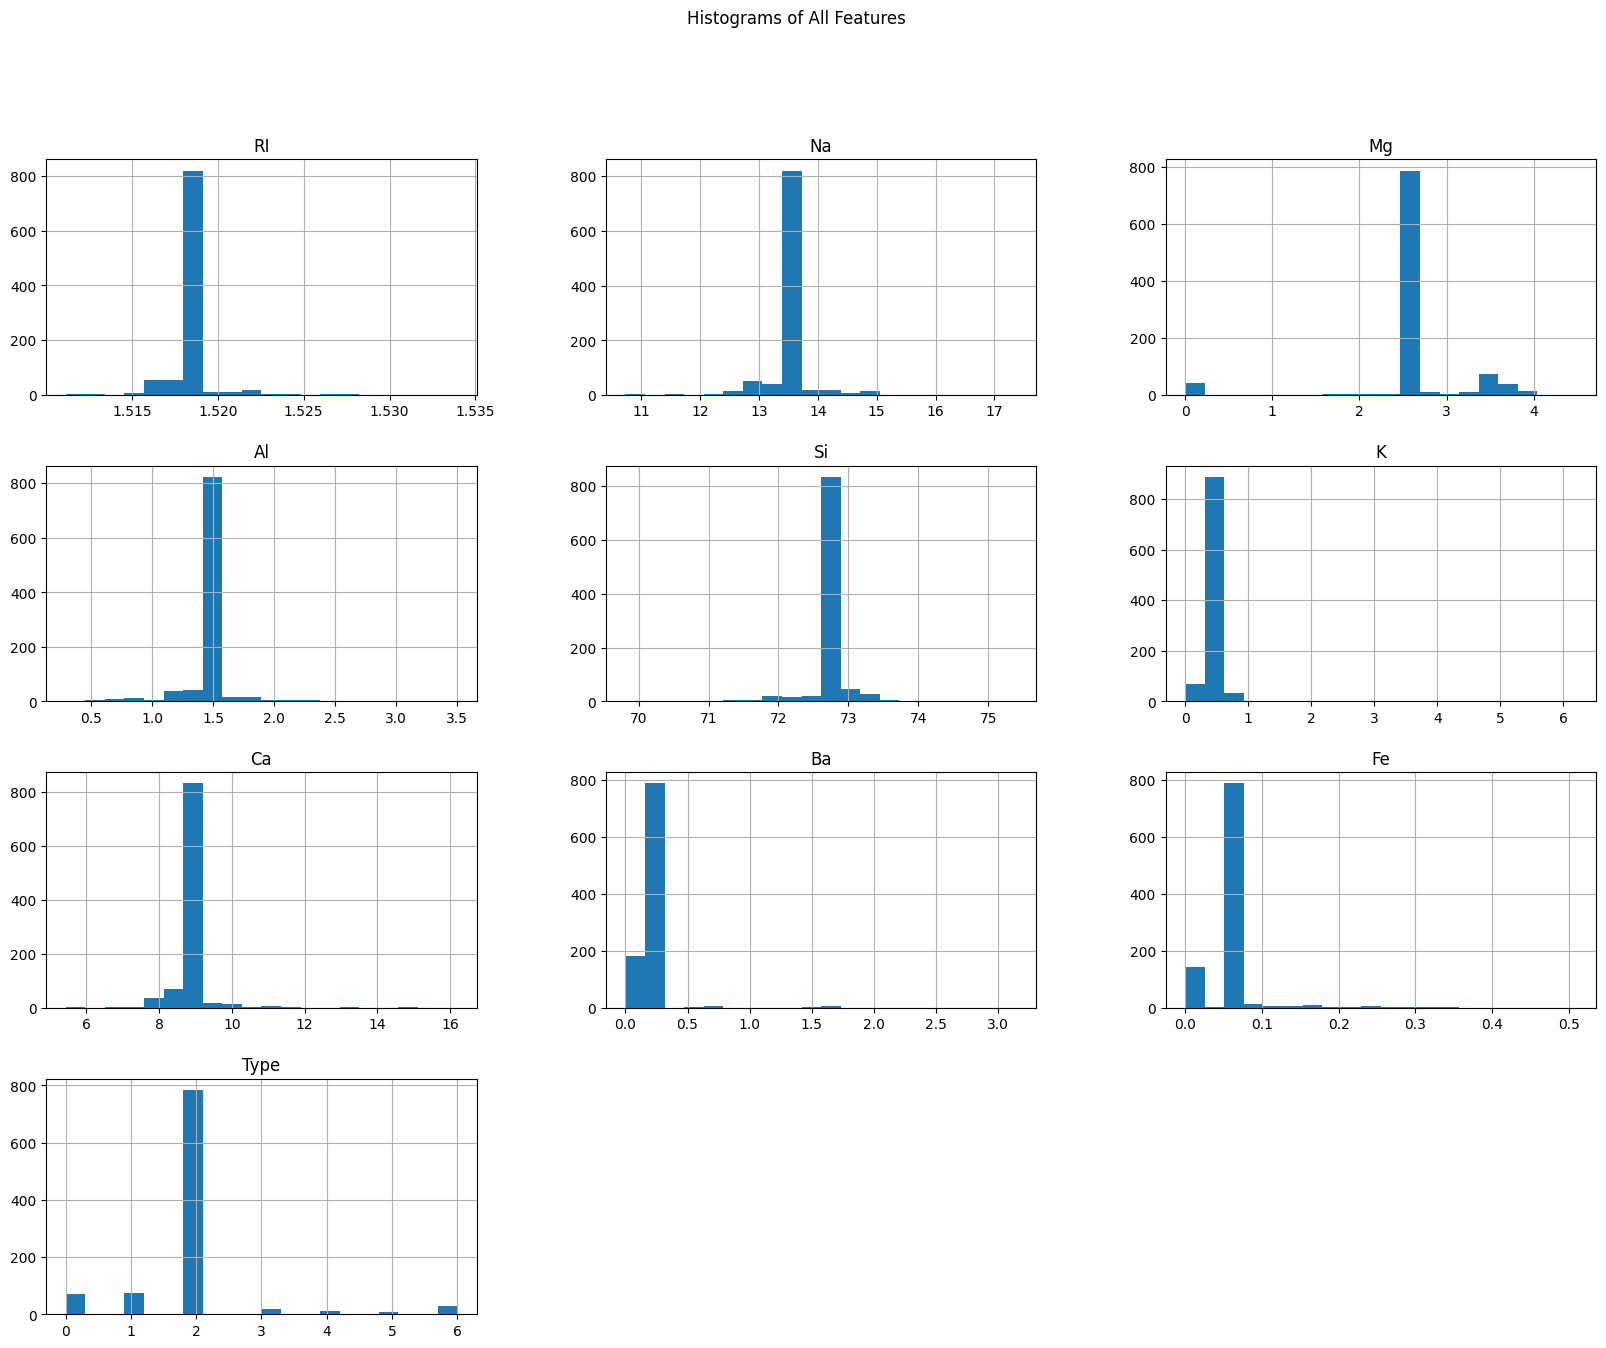

In [41]:
# Histograms
data_imputed.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of All Features')
plt.show()

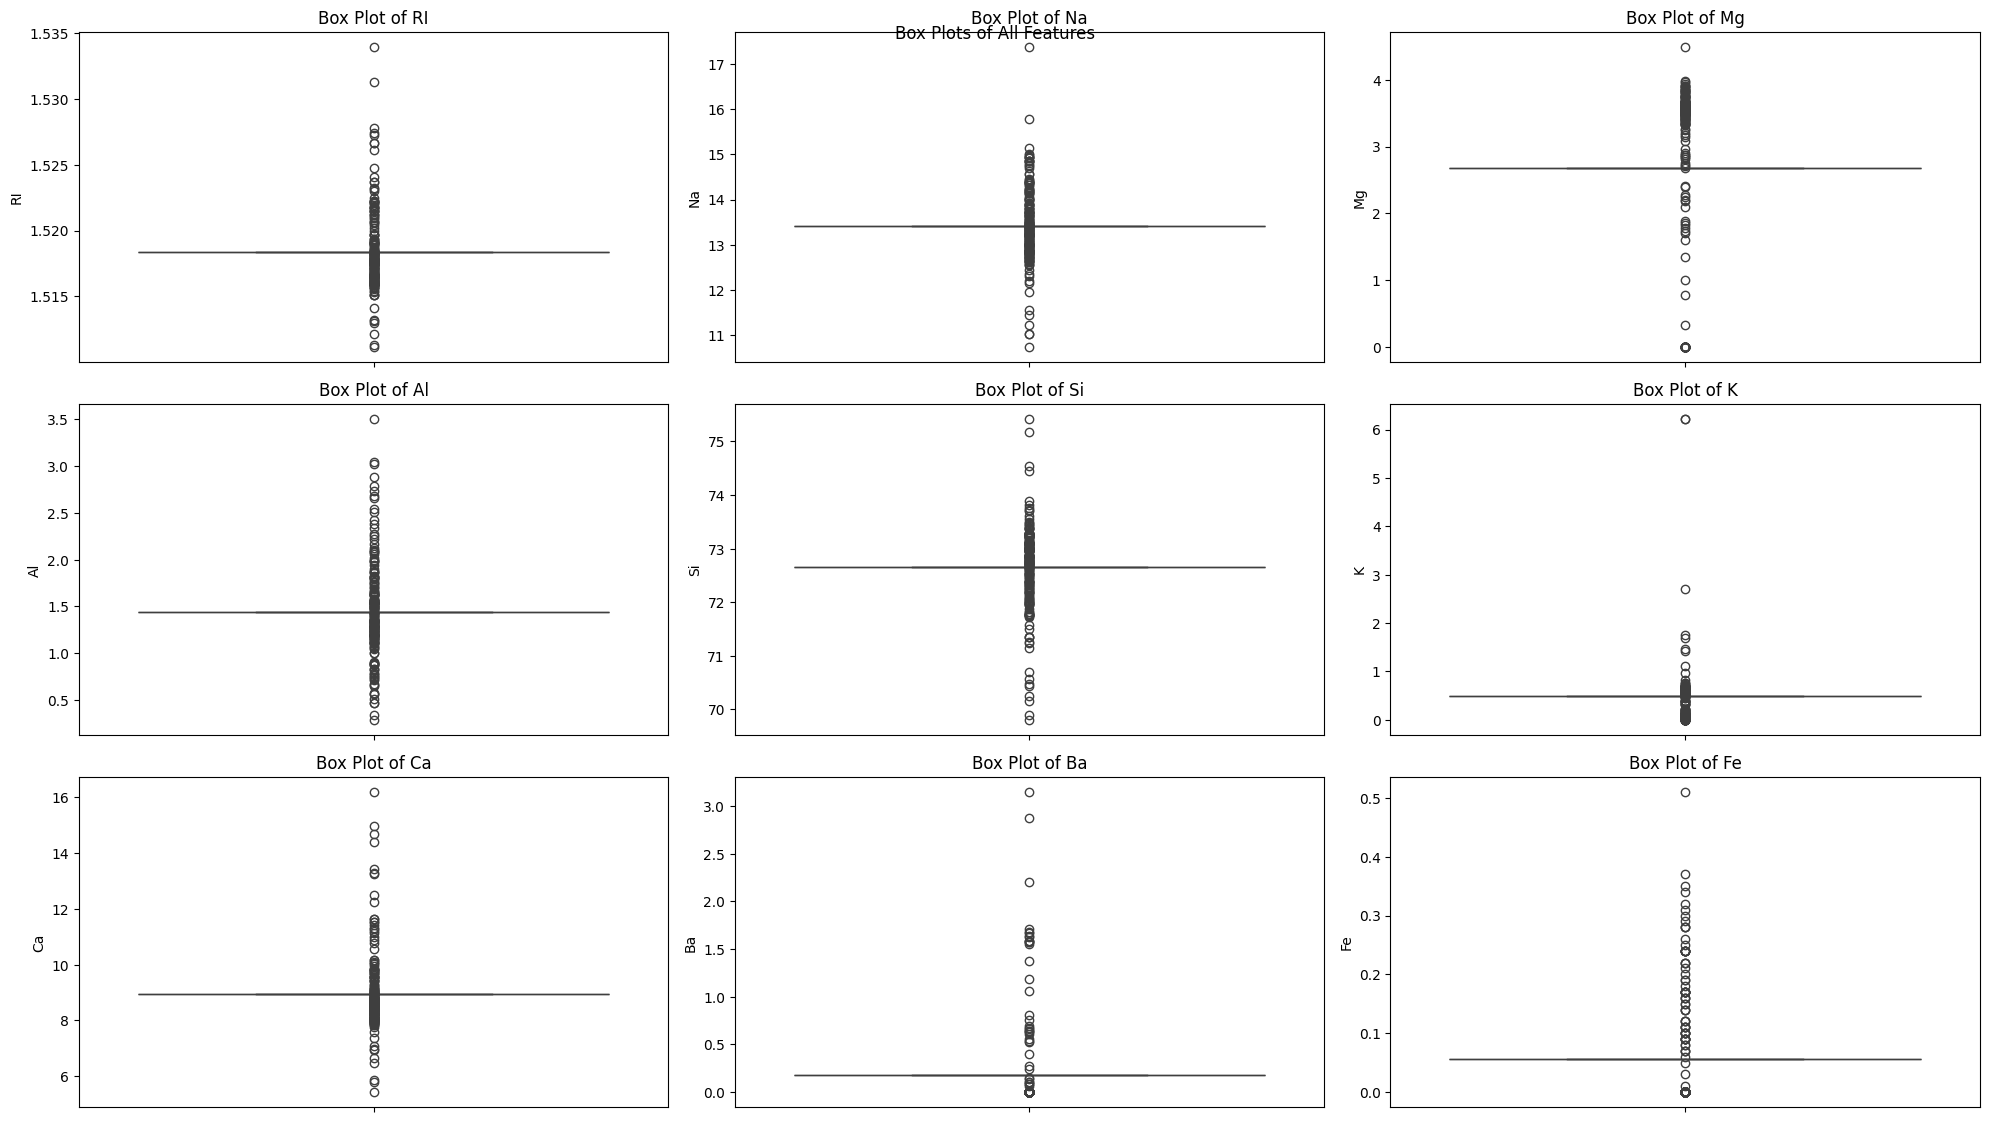

In [42]:
# Box Plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(data_imputed.columns[:-1], 1):  # Exclude 'Type'
    plt.subplot(4, 3, i)
    sns.boxplot(y=data_imputed[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.suptitle('Box Plots of All Features')
plt.show()

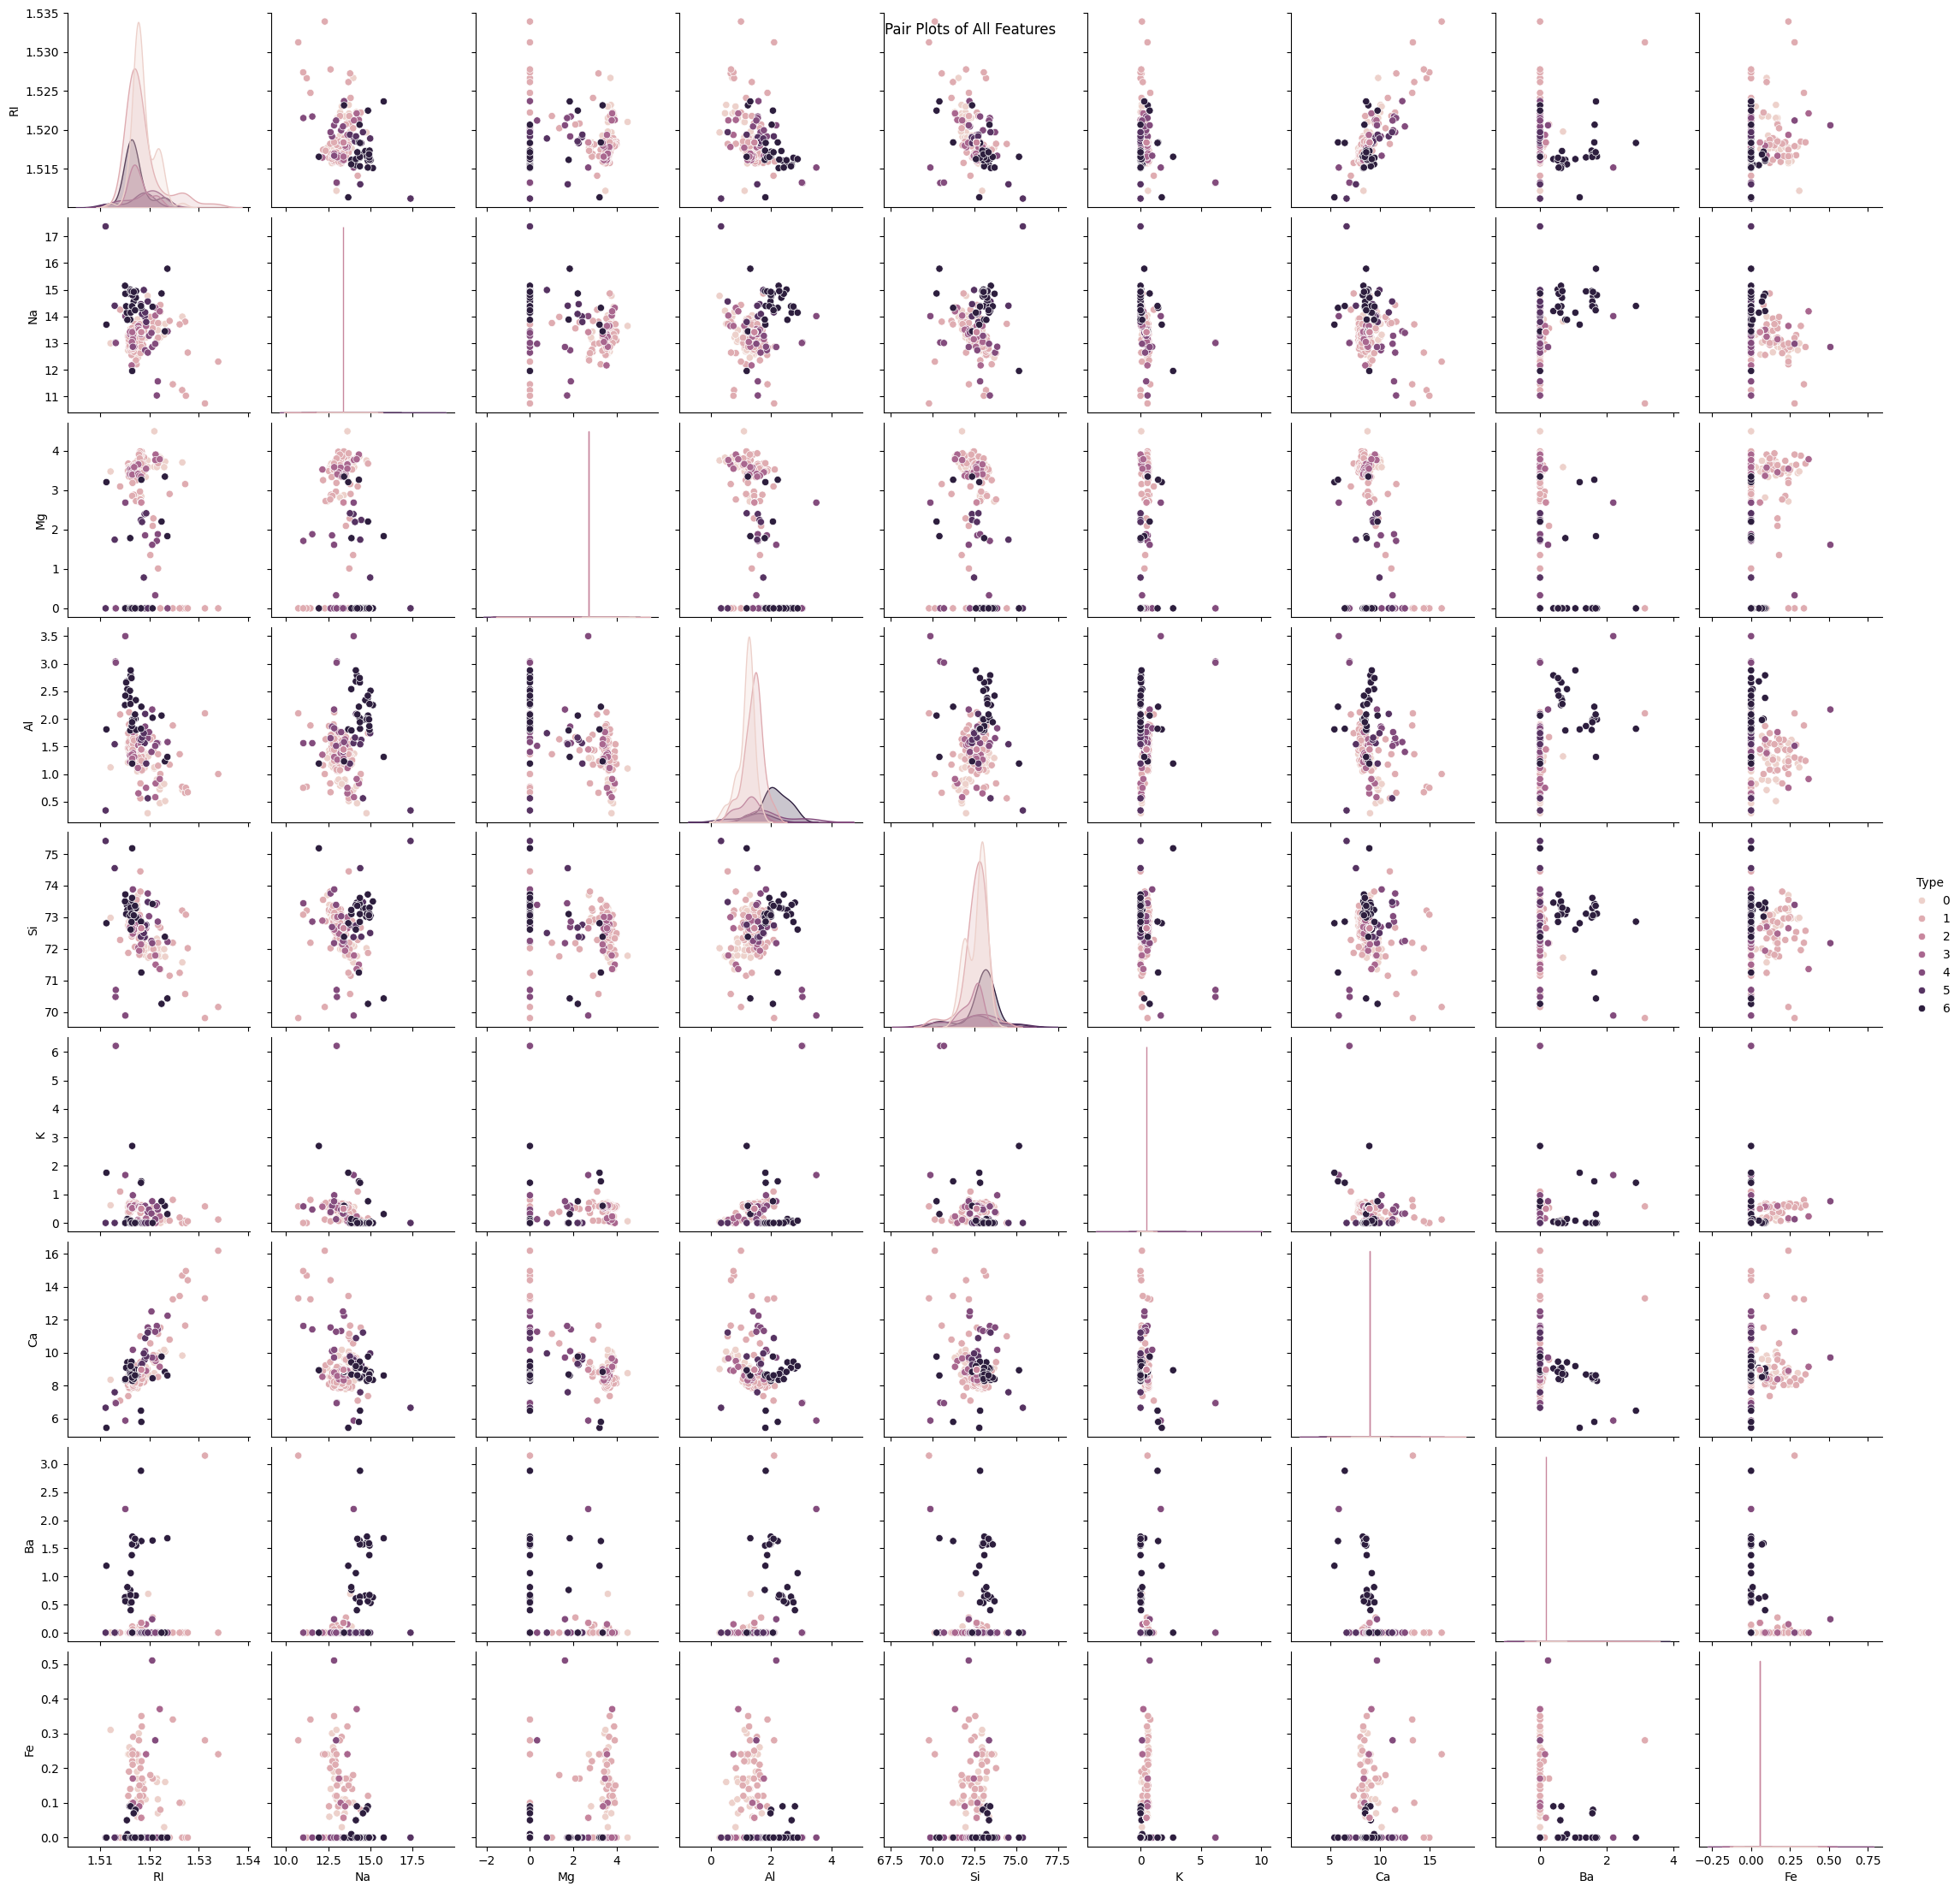

In [43]:
# Pair Plots
sns.pairplot(data_imputed, hue='Type', diag_kind='kde')
plt.suptitle('Pair Plots of All Features')
plt.show()

In [25]:
# Separate features and target
X = data_imputed.drop('Type', axis=1)
y = data_imputed['Type']

In [26]:
# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

In [29]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Predict on the test data
y_pred = rf_model.predict(X_test)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [32]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.98
Precision: 0.9816153846153847
Recall: 0.98
F1 Score: 0.9796031746031747


Bagging and Boosting Methods

In [33]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [34]:
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

In [35]:
print(f'Bagging - Accuracy: {accuracy_bagging}')
print(f'Bagging - Precision: {precision_bagging}')
print(f'Bagging - Recall: {recall_bagging}')
print(f'Bagging - F1 Score: {f1_bagging}')

Bagging - Accuracy: 0.97
Bagging - Precision: 0.9729166666666668
Bagging - Recall: 0.97
Bagging - F1 Score: 0.9696905393457118


In [39]:
from sklearn.ensemble import AdaBoostClassifier

boosting_model = AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42), n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

print(f'Boosting - Accuracy: {accuracy_boosting}')
print(f'Boosting - Precision: {precision_boosting}')
print(f'Boosting - Recall: {recall_boosting}')
print(f'Boosting - F1 Score: {f1_boosting}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosting - Accuracy: 0.98
Boosting - Precision: 0.9816153846153847
Boosting - Recall: 0.98
Boosting - F1 Score: 0.9796031746031747


**Bagging (Bootstrap Aggregating):**

Definition: Bagging is an ensemble method that aims to reduce the variance of a machine learning model. It involves training multiple models (usually of the same type) on different random subsets of the training data and then combining their predictions.

**Boosting:**

Definition: Boosting is an ensemble method that aims to convert weak learners into strong learners. It trains models sequentially, each new model focusing on the errors made by previous models.


**Differences Between Bagging and Boosting:**

Objective:

Bagging aims to reduce variance.
Boosting aims to reduce both bias and variance.

Model Training:

Bagging trains multiple models independently in parallel.
Boosting trains models sequentially, each new model focusing on the errors of the previous ones.

Combining Models:

In bagging, model predictions are combined by averaging (regression) or voting (classification).
In boosting, model predictions are combined using a weighted sum where more weight is given to models that perform better.

**Handling Imbalance in Data**

Imbalanced datasets are common in classification problems where one class significantly outnumbers the others. Handling imbalance is crucial to ensure that the model performs well across all classes. Here are some strategies:

Resampling Techniques:

Oversampling: Increase the number of instances in the minority class by duplicating samples or generating synthetic samples (e.g., SMOTE - Synthetic Minority Over-sampling Technique).

Undersampling:

Decrease the number of instances in the majority class by randomly removing samples.

Algorithmic Techniques:

Class Weights: Modify the learning algorithm to pay more attention to the minority class by assigning higher weights to it. Many machine learning libraries, like scikit-learn, allow setting class weights in algorithms (e.g., class_weight='balanced').

Ensemble Methods:

Use ensemble methods specifically designed to handle imbalance, such as Balanced Random Forest or EasyEnsemble.

Anomaly Detection Techniques:

Treat the minority class as anomalies or outliers and use anomaly detection methods to identify them.

Evaluation Metrics:

Use appropriate evaluation metrics that are sensitive to class imbalance, such as Precision, Recall, F1-Score, and the Area Under the Precision-Recall Curve (AUPRC) instead of overall accuracy.